<a href="https://colab.research.google.com/github/madonnaojorin/MAT494/blob/main/1.3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.3.1 QR Decomposition

####Theorem 1.3.1 (Gram-Schmidt) <br>
Let $\textbf{a}_1,\cdots,\textbf{a}_m$ in $\mathbb{R}^n$ be linearly independent.
Then there exist an orthonormal basis $\textbf{q}_1,\cdots,\textbf{q}_m$ of $\text{span}(\textbf{a}_1,\cdots,\textbf{a}_m)$.

For a square matrix $A$ the QR Decomposition converts $A$ into the product of an orthogonal matrix $Q$ (i.e. $Q^TQ=I$)
 and an upper triangular matrix $R$. Hence:
 $$A=QR$$

where column $i$ of the $m\times m$ matrix $R$ contains the coefficients of the linear combination of $\textbf{q}_j$’s that produces $\textbf{a}_i$. $Q$ is a $\mathbb{R}^{n\times m}$ matrix with $Q^TQ = I_{m\times m}$.
By the proof of Gram-Schmidt, $\textbf{a}_i \in span(\textbf{q}_1, \cdots,\textbf{q}_i)$. So column $i$ of $R$ has
only zeros below the diagonal. Hence $R$ has a special structure: it is upper triangular.

####The Gram-Schmidt orthogonalization process
Let $V$ be a vector space with an inner product. Suppose $\textbf{x}_1,\textbf{x}2,\cdots ,\textbf{x}_n$ is a basis for $V$. Let
\begin{array}\\
\textbf{v}_1 = \textbf{x}_1,\\
\textbf{v}_2 = \textbf{x}_2 −\frac{⟨\textbf{x}_2, \textbf{v}_1⟩}{⟨\textbf{v}_1, \textbf{v}_1⟩}
\textbf{v}_1,\\
\textbf{v}_3 = \textbf{x}_3-\frac{⟨\textbf{x}_3, \textbf{v}_1⟩}{⟨\textbf{v}_1, \textbf{v}_1⟩}\textbf{v}_1−\frac{⟨\textbf{x}_3, \textbf{v}_2⟩}{⟨\textbf{v}_2, \textbf{v}_2⟩}\textbf{v}_2,\\
\vdots\\
\textbf{v}_n = \textbf{x}_n-\frac{⟨\textbf{x}_n, \textbf{v}_1⟩}{⟨\textbf{v}_1, \textbf{v}_1⟩}\textbf{v}_1−\cdots-\frac{⟨\textbf{x}_n, \textbf{v}_{n-1}⟩}{⟨\textbf{v}_{n-1}, \textbf{v}_{n-1}⟩}\textbf{v}_{n-1},\\
\end{array}
Then $\textbf{v}_1,\textbf{v}_2,\cdots,\textbf{v}_n$ is an orthogonal basis for $V$

In [ ]:
import numpy as np 
def gram_schmidt(V):
    O = np.zeros(V.shape)
    for i in range(V.shape[1]):
        # orthogonalization
        vector = V[:, i]
        space = O[:, :i]
        projection = vector @ space
        vector = vector - np.sum(projection * space, axis=1)
        # normalization
        norm = np.sqrt(vector @ vector)
        vector /=round(abs(norm),ndigits=0)  < 1e-8 and 1 or norm
        
        O[:, i] = vector
    return O

In [ ]:
# 6 column vectors in 4D, only 3 are independent
vectors = np.array([
    [1, 1, 2, 0, 1, 1],
    [0, 0, 0, 1, 2, 1],
    [1, 2, 3, 1, 3, 2],
    [1, 0, 1, 0, 1, 1]
], dtype=float)
orthonormal = gram_schmidt(vectors)
print(orthonormal)
orthonormal.T @ orthonormal

[[ 5.77350269e-01 -1.57009246e-16 -4.44089210e-16 -3.08606700e-01
   0.00000000e+00 -4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  9.25820100e-01
   0.00000000e+00  0.00000000e+00]
 [ 5.77350269e-01  7.07106781e-01  4.44089210e-16  1.54303350e-01
   4.44089210e-16  2.22044605e-16]
 [ 5.77350269e-01 -7.07106781e-01 -8.88178420e-16  1.54303350e-01
  -4.44089210e-16 -6.66133815e-16]]


array([[ 1.00000000e+00, -2.57016008e-16, -5.12790050e-16,
        -8.55701270e-18,  0.00000000e+00, -5.12790050e-16],
       [-2.57016008e-16,  1.00000000e+00,  9.42055475e-16,
         1.12240478e-16,  6.28036983e-16,  6.28036983e-16],
       [-5.12790050e-16,  9.42055475e-16,  1.18329136e-30,
         6.85244528e-17,  5.91645679e-31,  8.87468518e-31],
       [-8.55701270e-18,  1.12240478e-16,  6.85244528e-17,
         1.00000000e+00,  7.39557099e-32,  6.85244528e-17],
       [ 0.00000000e+00,  6.28036983e-16,  5.91645679e-31,
         7.39557099e-32,  3.94430453e-31,  3.94430453e-31],
       [-5.12790050e-16,  6.28036983e-16,  8.87468518e-31,
         6.85244528e-17,  3.94430453e-31,  6.90253292e-31]])

In [ ]:
matrix = np.array([
    [1, 1, -1],
    [1, 2, 1],
    [1, 3, 0]
], dtype=float)
Q = gram_schmidt(matrix)
print('Q is ', Q)

R = Q.T @ matrix
print('R is ', R)

QR = Q @ R
print('QR is ', QR)

Q is  [[ 5.77350269e-01 -7.07106781e-01 -4.08248290e-01]
 [ 5.77350269e-01 -3.14018492e-16  8.16496581e-01]
 [ 5.77350269e-01  7.07106781e-01 -4.08248290e-01]]
R is  [[ 1.73205081e+00  3.46410162e+00  0.00000000e+00]
 [-9.99200722e-16  1.41421356e+00  7.07106781e-01]
 [ 5.55111512e-16  1.33226763e-15  1.22474487e+00]]
QR is  [[ 1.00000000e+00  1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00  1.18063813e-16]]


##1.3.2 Least-squares Problems

Theorem 1.3.2 (Normal Equations) <br>
Let $A \in \mathbb{R}^{n\times m}$ be an $n \times m$ matrix with
linearly independent columns and let $\textbf{b} \in \mathbb{R}^n$ be a vector. The solution to the least-squares problem 
$$\min_{x\in\mathbb{R}^m}||A\textbf{x}−\textbf{b}||.$$
satisfies
$$A^TA\textbf{x}=A^T\textbf{b}$$
which are known as the normal equations.

###Implementing Normal Equation 
####1. Backgroound 
The normal equation is a closed-form solution of figuring out the value of parameter. When $A$ has linearly independent columns, in view of the QR decomposition,
it can be shown that $A^TA$ is invertible and the solution of of the Nomal Equation is $(A^TA)^{-1}A^T\textbf{b}$, where $\textbf{b}$ is a vector containing our target values.

####2. Data generation
 
Now, we need data on which we can apply the Normal Equation. Let's generate some random data with some noise to create dome deviation.

In [ ]:
def generate_data():  
    A = 2 * np.random.rand(100, 1)  
    b = 4 + 3 * A + np.random.randn(100, 1)       
    return A, b  

####3. Defining the normal equation
We get a value of the paarameter that will minimize the cost function.

In [ ]:
from numpy.linalg import inv
def get_best_param(A, b):  
    A_transpose = A.T  
    best_params = inv(A_transpose.dot(A)).dot(A_transpose).dot(b)  
    return best_params # returns a list  

####4. Plot the data generated

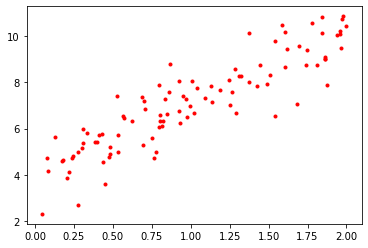

In [ ]:
A, b = generate_data()  
%matplotlib inline  
import matplotlib.pyplot as plt  
  
plt.plot(A, b, "r.")  

In [ ]:
A_b = np.c_[np.ones((100, 1)), A] # set bias term to 1 for each sample  
params = get_best_param(A_b, b)  
print(params)  

[[4.03799158]
 [3.06441531]]


####5. Get a prediction
How do we get the prediction? We have another Theorem.

Theorem 1.3.3 (Least Squares via QR) <br>
Let $A \in \mathbb{n\times m}$ be an $n\times m$ matrix with linearly independent columns, let $b \in \mathbb{R}^n$ be a vector, and let $A = QR$ be a QR decomposition of A, where Q is a $\mathbb{R}^{n\times m}$ matrix with $Q^TQ = I_{m\times m}$ and $R$ is upper triangular. The solution to the least-squares problem
$$\min_{x\in\mathbb{R}^m}||A\textbf{x}-\textbf{b}||.$$
satisfies
$$R\textbf{x}^*=Q^T\textbf{b}.$$

Using this equation, we get the prediction for our data.

In [ ]:
test_A = np.array([[0], [2]])   
test_A_b = np.c_[np.ones((2, 1)), test_A]  
  
prediction = test_A_b.dot(params)  
print(prediction)  

[[ 4.03799158]
 [10.16682221]]


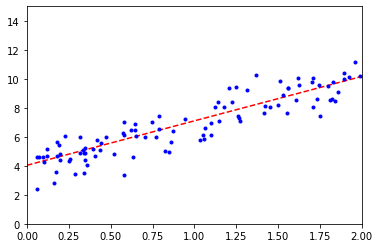

In [ ]:
plt.plot(test_A, prediction, "r--")  
plt.plot(A, b, "b.")  
plt.axis([0, 2, 0, 15])
plt.show() 

We implemented the closed-form Normal Equation and applied it to predict output for a Linear regression problem using QR decomposition. 

##1.3.3 Linear Regression


###Linear Regression from scratch
####1. Data generation


In [44]:
import pandas as pd

# Generate 'random' data
np.random.seed(0)
A = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
b = 2 + 0.3 * A + res                  # Actual values of Y

# Create pandas dataframe to store our A and b values
df = pd.DataFrame(
    {'A': A,
     'b': b}
)

# Show the first five rows of our dataframe
df.head()

,A,b
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


####2. Calculate mean
To estimate $\textbf{b}$ using the Ordinary Linear Regression method, we need to calculate Amean and bmean, the covariance of $A$ and $\textbf{b}$ (Abcov), and the variance of $A$ (Avar) before we can determine the values for $\alpha$ and $\beta$.

In [45]:
# Calculate the mean of A and b
Amean = np.mean(A)
bmean = np.mean(b)

# Calculate the terms needed for the numator and denominator of beta
df['Abcov'] = (df['A'] - Amean) * (df['b'] - bmean)
df['Avar'] = (df['A'] - Amean)**2

# Calculate beta and alpha
beta = df['Abcov'].sum() / df['Avar'].sum()
alpha = bmean - (beta * Amean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


####3. Get a prediction

In [46]:
ypred = alpha + beta * A

####4. Plot the data and the fitted line

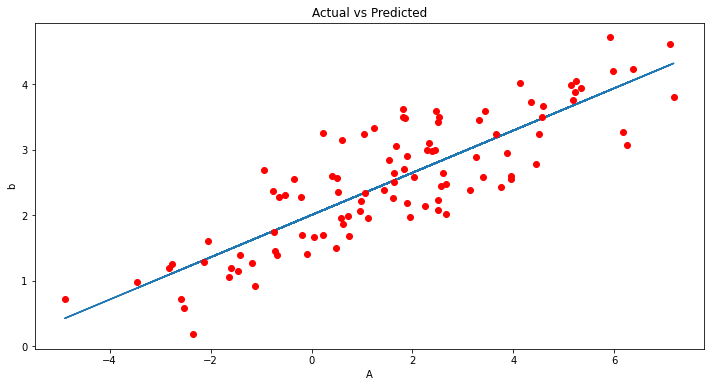

In [47]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(A, ypred)     # regression line
plt.plot(A, b, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('A')
plt.ylabel('b')

plt.show()

###Linear Regression with scikit-learn
####1. Initialise and fit the model 

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(A, b)
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [4.03799158]
betas = [[3.06441531]]


####2. Get a prediction

In [41]:
predicted = model.predict(A)

####3. Plot the data and the fitted line

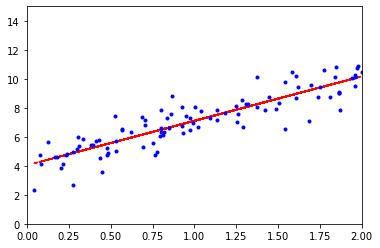

In [40]:
plt.plot(A, predicted, "r--")  
plt.plot(A, b, "b.")  
plt.axis([0, 2, 0, 15])
plt.show() 